In [1]:
import tensorflow as tf
import numpy as np
import pickle


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_7_4.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)

x_train = input_data[:151200, :]
#x_test = input_data[971320:976320, :]


(151200, 24)


In [4]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_7_4.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
y_train = output_data[:151200, :]
#y_test = output_data[971320:976320, :]
print(output_data.shape)

(151200, 12)


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 50, verbose = 2)#, validation_data = (x_test, y_test))


Train on 151200 samples
Epoch 1/50
151200/151200 - 2s - loss: 0.1978 - accuracy: 0.9072
Epoch 2/50
151200/151200 - 2s - loss: 0.1228 - accuracy: 0.9403
Epoch 3/50
151200/151200 - 2s - loss: 0.0796 - accuracy: 0.9651
Epoch 4/50
151200/151200 - 2s - loss: 0.0567 - accuracy: 0.9763
Epoch 5/50
151200/151200 - 2s - loss: 0.0426 - accuracy: 0.9829
Epoch 6/50
151200/151200 - 2s - loss: 0.0326 - accuracy: 0.9875
Epoch 7/50
151200/151200 - 2s - loss: 0.0258 - accuracy: 0.9903
Epoch 8/50
151200/151200 - 2s - loss: 0.0204 - accuracy: 0.9927
Epoch 9/50
151200/151200 - 2s - loss: 0.0171 - accuracy: 0.9939
Epoch 10/50
151200/151200 - 2s - loss: 0.0133 - accuracy: 0.9955
Epoch 11/50
151200/151200 - 2s - loss: 0.0112 - accuracy: 0.9963
Epoch 12/50
151200/151200 - 2s - loss: 0.0089 - accuracy: 0.9972
Epoch 13/50
151200/151200 - 2s - loss: 0.0076 - accuracy: 0.9976
Epoch 14/50
151200/151200 - 2s - loss: 0.0064 - accuracy: 0.9980
Epoch 15/50
151200/151200 - 2s - loss: 0.0054 - accuracy: 0.9983
Epoch 16/5

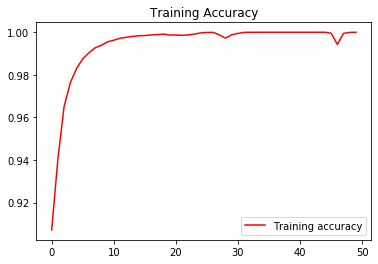

In [8]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
#val_acc = history.history['val_accuracy']
#val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
#plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
#plt.title('Training and Validating Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [9]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_7_4_model.h5')